
# Проверка гипотез с помощью python.

# Задание

* Выполнить проверку предложенной гипотезы
* Выполнить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-м уровнем достоверности (т.е. значение р < 0,05)

# Датасет

**Как данные представлены заказчиком:**

customerID - Содержит идентификатор клиента
gender - Пол клиента
SeniorCitizen - Является ли клиент пожилым гражданином
Partner - Есть ли у клиента партнер
Dependents - Является ли клиент кормильцем
tenure - Количество месяцев, в течение которых клиент оставался в компании
PhoneService - Есть ли у клиента телефонная связь
MultipleLines - Есть ли у клиента несколько линий
InternetService - Интернет-провайдер клиента
OnlineSecurity - Есть ли у клиента онлайн-безопасность
OnlineBackup - Есть ли у клиента онлайн-резервное копирование
DeviceProtection - Имеет ли клиент защиту устройства
TechSupport - Есть ли у клиента техническая поддержка
streamingTV - Есть ли у клиента потоковое телевидение
streamingMovies - Есть ли у клиента стриминговые сервисы
Contract - Срок действия контракта заказчика
PaperlessBilling - имеет ли клиент безналичные счета
PaymentMethod - Способ оплаты клиента
MonthlyCharges - Сумма, взимаемая с клиента ежемесячно
TotalCharges - Общая сумма, списанная с клиента
Churn - Ушел ли клиент

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию :

- Клиенты, которые ушли в течение последнего месяца — колонка называется `Churn`
- Услуги, на которые подписался каждый клиент — телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов — как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах — пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

**Импортируйте необходимые библиотеки**

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # отобразить все колонки

from scipy import stats

# Данные

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/1.4churn.csv', delimiter=',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Описательный анализ данных

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Опишем наш датафрейм в общем:
 - Всего 7043 строки, пустые строки (NaN) отсутствуют
 - Всего 21 колонка. Из них со значениями float64 1 колонка, int64 2 колонки, object 18 колонок
 - Объем занимаемый датафреймом 1.1+ MB

**Рассмотрите данные — изучите медианы, средние, дисперсии и т.д.**

**Что можете сказать о данных? Сделайте вывод.**

Рассмотрим статистику для числовых данных:

In [12]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [13]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [14]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


count - Всего значений
mean - Среднее арифметическое
std - Стандартное отклонение
min - Минимальное значение
25%
50% - Медиана
75%
max - Максимальное значение

SeniorCitizen - Является ли клиент пожилым гражданином
tenure - Количество месяцев, в течение которых клиент оставался в компании
MonthlyCharges - Сумма, взимаемая с клиента ежемесячно

**Вывод:**
**В колонке SeniorCitizen значения только 0 и 1, т.е. данные условно обозначают да/нет, поэтому тут мы обратим внимание на общее количество значений и уникальные значения. Пропусков данных нет, минимальное значение 0, максимальное 1**

**В колонке tenure уже данные о количестве месяцев, минимальное значение 0, максимальное 72. Пропусков данных нет. В среднем 32.37 месяца клиенты остаются в компании (не учитывая являются ли они клиентами сейчас). Стандартное отклонение от среднего - 24.56 что говорит: данные распределены в широком диапазоне от среднего значения. Медиана по колонке 29, т.е. половина выборки имеет значение больше медианы, вторая половина меньше.**

**В колонке MonthlyCharges также пропусков нет, среднее значение 64,76 а стандартное отклонение 30,09. Данные также находятся распределены в широком диапазоне от среднего. Минимальное значение 18.25 а максимальное 118.75. Медиана 70.35, т.е. половина выборки имеет значение больше медианы, вторая половина меньше.**

# Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [69]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


count - Всего значений
unique - Уникальные
top - Большее количество значений
freq - Количество top

In [36]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

**Вывод:**
**По всем колонкам нет пропущенных значений**
**- customerID - все значения уникальные, как и должно быть, так как это id** 
**- gender - в выборке больше клиентов с мужским полом (3555 записей)** 2 уникальных значения ['Female', 'Male']
**- Partner -  в выборке больше клиентов без партнера (3641 записей)** 2 уникальных значения ['Yes', 'No']
**- Dependents - в выборке больше клиентов не являющимися кормильцами (4933 записей)** 2 уникальных значения ['Yes', 'No']
**- PhoneService - в выборке больше клиентов которые пользуются телефонной связью (6361 записей)** 2 уникальных значения ['Yes', 'No']
**- MultipleLines - в выборке больше клиентов у которых нет нескольких линий (3390 записей)** 3 уникальных значения ['No phone service', 'No', 'Yes']
**- InternetService - в выборке больше клиентов у которых Fiber optic интернет (3069 записей)** 3 уникальных значения ['DSL', 'Fiber optic', 'No']
**- OnlineSecurity - в выборке больше клиентов у которых нет онлайн-безопасности (3498 записей)** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- OnlineBackup - в выборке больше клиентов у которых нет онлайн-резервного копирования (3088 записей)** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- DeviceProtection - в выборке больше клиентов у которых нет защиты устройства (3095 записей)** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- TechSupport - в выборке больше клиентов у которых нет технической поддержки (3473 записи)** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- streamingTV - в выборке больше клиентов у которых нет потокового телевидения (2810 записей)** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- streamingMovies - в выборке больше клиентов у которых нет стриминговых сервисов (2785 записей)** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- Contract - в выборке больше клиентов у которых срок действия контракта заказчика Month-to-month (3875 записей)** 3 уникальных значения ['Month-to-month', 'One year', 'Two year']
**- PaperlessBilling - в выборке больше клиентов у которых есть безналичные счета (4171 записей)** 2 уникальных значения ['Yes', 'No']
**- PaymentMethod - большее количество клиентов предпочитают Electronic check как способ оплаты (2365 записи)** 24 уникальных значения ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
**- TotalCharges - Общая сумма, списанная с клиента** 6531 уникальных значений
**- Churn - большее количество клиентов не ушло (5174 записей)** 2 уникальных значения ['Yes', 'No']

# По большому счету мы можем перевести значения из типа object в тип float и посчитать все значения как у числовых данных, сделаем это ниже:

# 3. Предобработка данных

# Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [77]:
len(df)- len(df.drop_duplicates ())

0

дубликаты не были обнаружены, но если бы они были мы могли воспользоваться:

In [ ]:
df = df.drop_duplicates()

# Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению, бывают проблемы с выгрузками данных, некачественными источниками, или, когда данные записываются вручную — часто присутствует человеческий фактор. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [78]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [79]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы не потерять данные, а:

1) Заменить значения на другое
2) Поменять на другое — но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [80]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [81]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2409,3275-RHRNE,Male,0,Yes,Yes,28,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),60.00,1682.05,No
2413,7021-XSNYE,Male,0,Yes,Yes,7,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),49.65,305.55,No
5577,4163-HFTUK,Male,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.10,1007.80,No
630,5099-BAILX,Male,1,Yes,Yes,43,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),110.75,4687.90,Yes
6343,0902-RFHOF,Male,0,No,No,38,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,730.10,No


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно, умноженной на количество времени?

Давайте посмотрим.

In [82]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Значит `TotalCharges` = `MonthlyCharges` * время. В данном датасете указано только количество месяцев, без точного времени, потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0.

Заменим пропуски на нужное нам число.

In [83]:
df['TotalCharges'].fillna(0, inplace=True)

# Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [97]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod - не меняем, оставляем тип object
SeniorCitizen, tenure - не меняем, оставляем тип int64
MonthlyCharges, TotalCharges - не меняем, оставляем тип float64

**Вывод:**



```
# Выбран кодовый формат
```

# 4. Проверка гипотез

Задание: сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Нулевая гипотеза - среднее количество месяцев, в течение которых клиент оставался в компании не отличается между двумя выборками
Альтернативная гипотеза - среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками

Создадим 2 датафрейма:

In [98]:
churn_no = df[df['Churn'] == 'No']
churn_no.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [99]:
churn_yes = df[df['Churn'] == 'Yes']
churn_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [100]:
churn_no['tenure'].mean()

37.56996521066873

In [101]:
churn_yes['tenure'].mean()

17.979133226324237

Альтернативная Гипотеза подтверждена — среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [116]:
t_stat, pvalue = stats.ttest_ind(churn_no['tenure'], churn_yes['tenure'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**Вывод:**

# 5. Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ — соответствуют ли распределения нормальному?

**Нулевая гипотеза - распределение значений в выборке соответствует нормальному распределению**
**Альтернативная гипотеза - распределение значений в выборке не соответствует нормальному распределению**

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

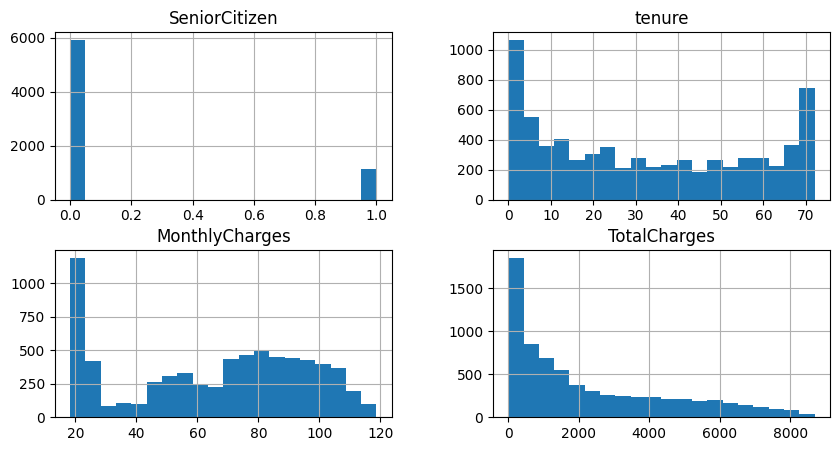

In [117]:
df.hist(bins=20, figsize=(10,5))

Просто взглянув на эту гистограмму, мы можем сказать, что набор данных не имеет «колокольчатой формы» и не имеет нормального распределения.

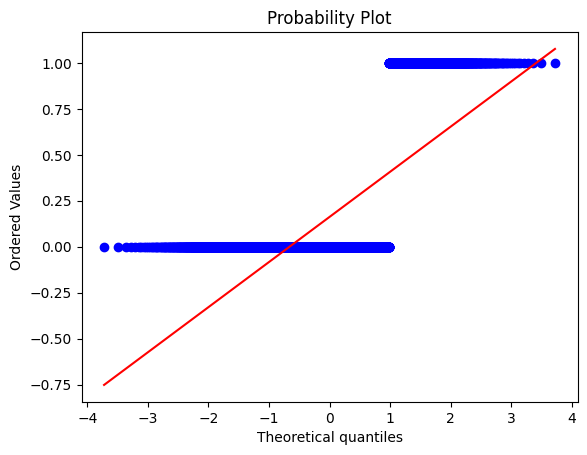

In [120]:
import pylab

stats.probplot(df['SeniorCitizen'], dist='norm', plot=pylab)
pylab.show()

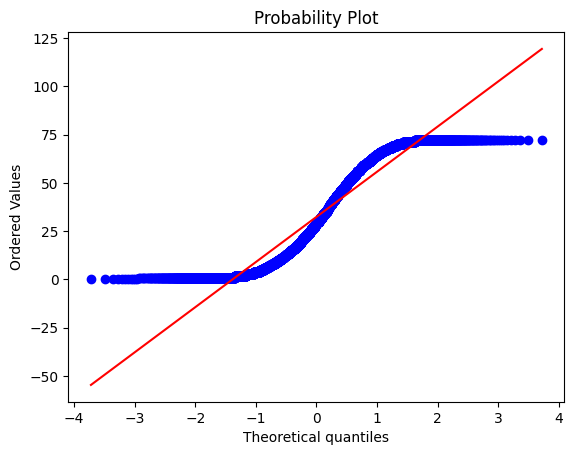

In [121]:
stats.probplot(df['tenure'], dist='norm', plot=pylab)
pylab.show()

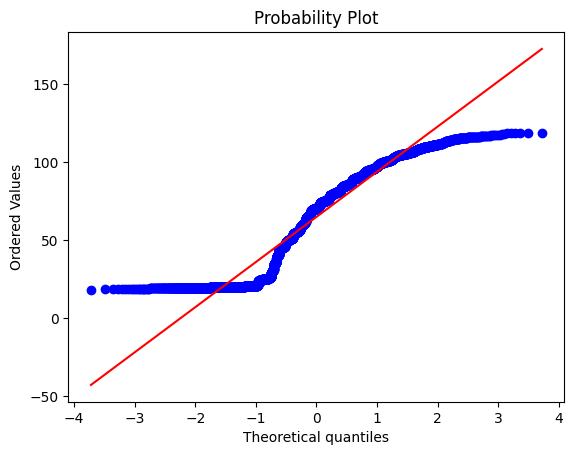

In [122]:
stats.probplot(df['MonthlyCharges'], dist='norm', plot=pylab)
pylab.show()

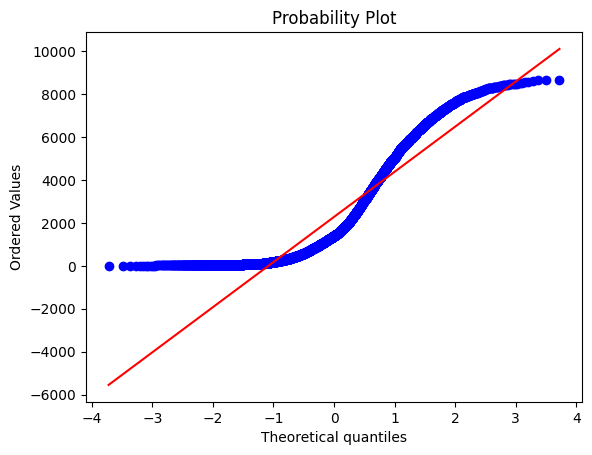

In [123]:
stats.probplot(df['TotalCharges'], dist='norm', plot=pylab)
pylab.show()

На этих графиках мы так же видим не нормальное распределение, так как при нормальном все точки были бы расположены вдоль "диагональной" линии

In [124]:
from scipy.stats import shapiro 

df_ = np.random.normal(loc=50, scale=20, size=5000)

print(shapiro(df['SeniorCitizen']))
print(shapiro(df['tenure']))
print(shapiro(df['MonthlyCharges']))
print(shapiro(df['TotalCharges']))

ShapiroResult(statistic=0.4433855414390564, pvalue=0.0)
ShapiroResult(statistic=0.9037514925003052, pvalue=0.0)
ShapiroResult(statistic=0.9208890199661255, pvalue=0.0)
ShapiroResult(statistic=0.8601522445678711, pvalue=0.0)


C:\Users\1will\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Поскольку p-значение меньше 0,05, мы отвергаем нулевую гипотезу 

Это означает, что у нас есть достаточно доказательств, чтобы сказать, что данные выборки не получены из нормального распределения.

**Вывод:**

На выборке из 7043 строк мы проверили следующую работу:

- Посмотрели общую статистику по количественным и категориальным переменным
- Преобразовали колонку TotalCharges для анализа
- Проверили выборки по `Churn='No'` и `Churn='Yes'`, подтвердили альтернативную гипотезу (среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками)
- Проверили выборку на нормальное распределение и подтвердили альтернативную гипотезу (распределение значений в выборке не соответствует нормальному распределению)

Опишите данные и результат исследования, основываясь на предыдущих шагах:

Выборка, состоящая из 7043 строк, 21 колонки. Со значениями float64 2 колонка, int64 2 колонки, object 17 колонок (после преобразования).
Данные не соответствует нормальному распледелению
Для нашего заказчика мы можем сказать, что количество клиентов, которые остались в компании - 5174 (73,46%), а ушло 1869 (26,54%)